In [0]:
from sklearn import datasets, linear_model, model_selection

# load the data
diabetes = datasets.load_diabetes()

# target
y = diabetes.target

# features
X = diabetes.data

In [14]:
# the first patient has index 0
print(y[0])

151.0


In [15]:
# lets look at the first patients data
print(
  dict(zip(diabetes.feature_names, X[0]))
)

{'age': 0.0380759064334241, 'sex': 0.0506801187398187, 'bmi': 0.0616962065186885, 'bp': 0.0218723549949558, 's1': -0.0442234984244464, 's2': -0.0348207628376986, 's3': -0.0434008456520269, 's4': -0.00259226199818282, 's5': 0.0199084208763183, 's6': -0.0176461251598052}


Text(0, 0.5, 'P(alpha)')

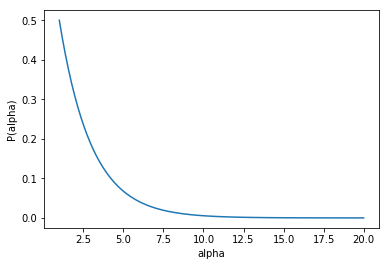

In [16]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# values of alpha
x = np.linspace(1, 20, 100)

# probabilities
p_X = stats.gamma.pdf(x=x, a=1, loc=1, scale=2)

plt.plot(x,p_X)
plt.xlabel('alpha')
plt.ylabel('P(alpha)')

In [0]:
# n sample values
n_iter = 100

# sample from the gamma distribution
samples = stats.gamma.rvs(a=1, loc=1, scale=2, size=n_iter, random_state=100)

Text(0, 0.5, 'sample count')

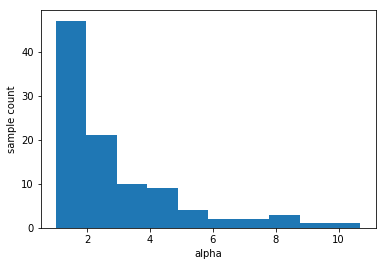

In [18]:
# visualise the sample distribution
plt.hist(samples)
plt.xlabel('alpha')
plt.ylabel('sample count')

In [0]:
# we will store the results inside a dictionary
result = {}

# for each sample
for sample in samples:
  
  # initialize a ridge regression estimator with alpha set to the sample value
  reg = linear_model.Ridge(alpha=sample)
  
  # conduct a 10-fold cross validation scoring on negative mean squared error
  cv = model_selection.cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')
  
  # retain the result in the dictionary
  result[sample] = [cv.mean()]

In [20]:
import pandas as pd

# convert the result dictionary to a pandas dataframe, transpose and reset the index
df_result = pd.DataFrame(result).T.reset_index()

# give the columns sensible names
df_result.columns = ['alpha', 'mean_neg_mean_squared_error']

print(df_result.sort_values('mean_neg_mean_squared_error', ascending=False).head(5))

       alpha  mean_neg_mean_squared_error
4   1.009460                 -3368.572167
26  1.011409                 -3369.403727
29  1.030745                 -3377.629026
43  1.041302                 -3382.102466
34  1.074316                 -3396.012056


Text(0, 0.5, '-MSE')

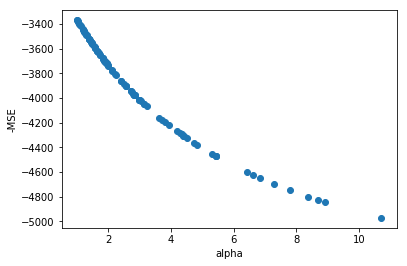

In [21]:
plt.scatter(df_result.alpha, df_result.mean_neg_mean_squared_error)
plt.xlabel('alpha')
plt.ylabel('-MSE')